# PROJECT NAME : RETAIL SALES PREDICTION.
## Project Type: Regression Analysis


---



---

## Project Summary:

---

---

Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of indivitual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. We are provided with historical sales data for **1115 Rossmann stores**. The task is to forecast the **sales column** for the test set. Some of the stores in the dataset were temporarily closed for refurbishment.

## Data Description of each column in our dataset:

---

---


1.   **Id** ⇒ Unique entry id.
2.   **Store** ⇒ Store id
1.   **Sales** ⇒ Sales made for the day
1.   **Customers** ⇒ No. of Customers for the day
1.   **Open** ⇒ Wheather the store was opened or closed (0: closed & 1: open).
2.   **StateHoliday** ⇒ Wheather the day was State holiday or not.
2.   **SchoolHoliday** ⇒ Wheather the day was School holiday or not.
2.   **StoreType** ⇒ Types of Stores.
1.   **Assortment** ⇒ Types of assortment.
1.   **Competitiondistance** ⇒ Distance from the nearest competetor store.
2.   **promo** ⇒ Store running promo or not.
2.   **Promo2** ⇒ Store running consequitive promo or not.




In [125]:
# Importing all the Library.
import numpy as np
from numpy import math
import pandas as pd

from datetime import datetime
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/store.csv")

In [4]:
rossmann_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/Rossmann Stores Data.csv")

## **Exploratory Data Analysis on sales_df**

In [5]:
sales_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
sales_df.shape

(1115, 10)

In [7]:
sales_df.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
sales_df.describe(include= 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [10]:
# duplicates
len(sales_df[sales_df.duplicated()])

0

In [11]:
# Total count of Null values.
sales_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### As there are lots of NaN values in CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval, we will drop those columns.

In [12]:
cols_to_drop= ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [13]:
# Dropping the columns with more Null values.
sales_df.drop(cols_to_drop, inplace= True, axis=1)

In [14]:
sales_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1


### As CompetitionDistance column contains less Null values, we won't remove that column. Rather we would replace those Null values.

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

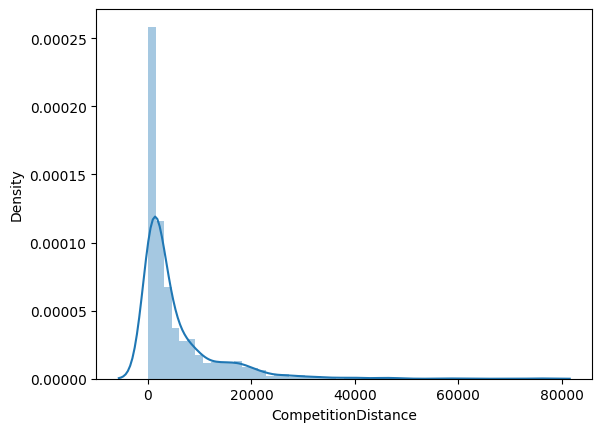

In [15]:
sns.distplot(sales_df.CompetitionDistance)

#### As the distribution is skewed here, it is wise to replace the Null values with Median.


In [16]:
sales_df['CompetitionDistance'].fillna(sales_df.CompetitionDistance.median(), inplace= True)

In [17]:
sales_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [18]:
sales_df.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

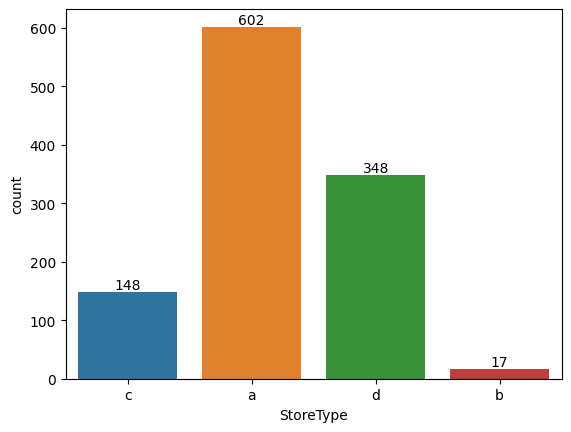

In [19]:
# Let's check the store type column.
fig= sns.countplot(x= 'StoreType', data= sales_df)

for i in fig.containers:
    fig.bar_label(i)

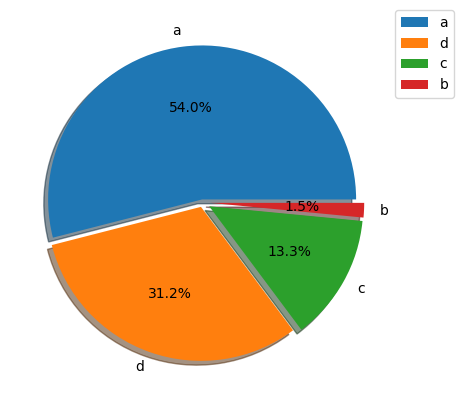

In [20]:
# Let's check it with a pie chart
plt.figure(figsize=(10,5))
explode= [0.02, 0.03, 0.05,0.05]
plt.pie(sales_df['StoreType'].value_counts(), labels= sales_df.StoreType.value_counts().index, startangle=0, autopct= '%1.1f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
plt.show()

## Here we can see that type-a store type is maximum i.e 54% in our data set followed by type-d i.e about 31%.

## While type-b store types is comparatively less i.e  only 1.5%.

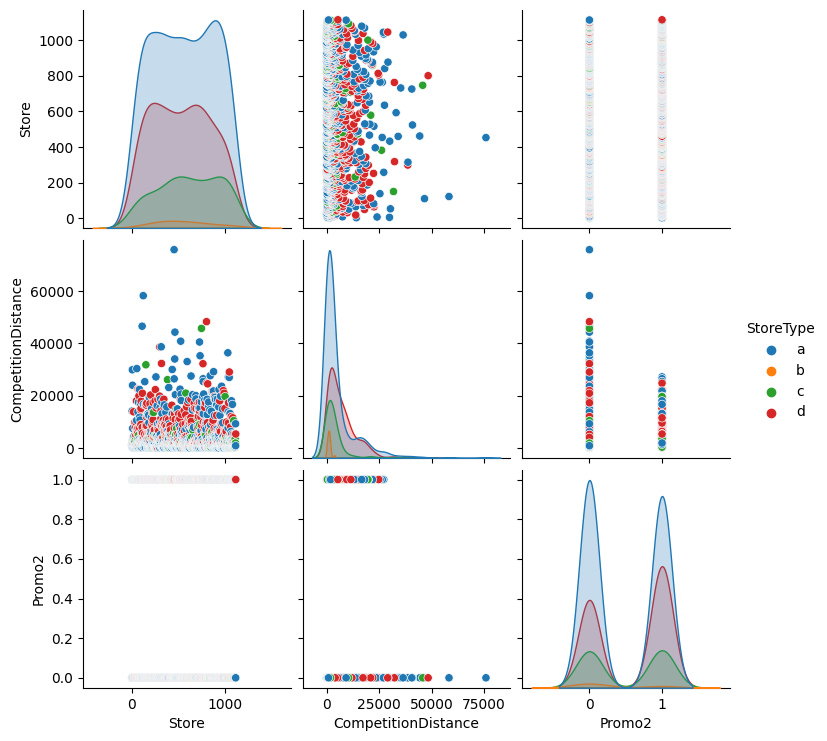

In [21]:
# Let's use pairplot for StoreType to check pairwise relationships between variables within a dataset.
fig= sns.pairplot(sales_df, hue= 'StoreType', hue_order=['a', 'b', 'c', 'd'])

## Here we can see that most of the stores are located in 20000 meter range. So we can say that cometetion is high over here.

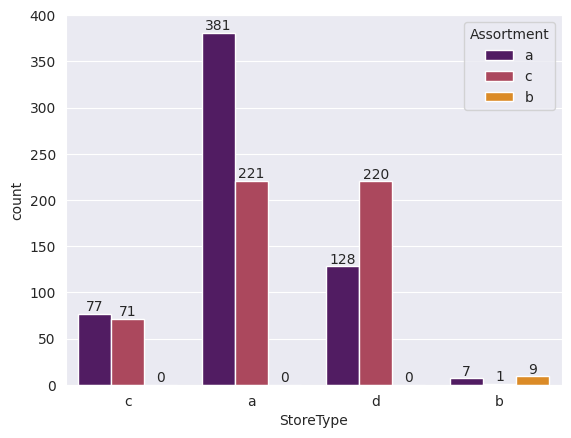

In [22]:
# Let's check assortment type count with respect to store type.
sns.set_style('darkgrid')
store_types= sns.countplot(x= 'StoreType', hue= 'Assortment', data= sales_df, palette= 'inferno')

for i in store_types.containers:
    store_types.bar_label(i)

## From abobe plot we can see that:
### In store type- c & a, assortment type-a is more compared to others.
### But in store type-d, assortment type-c is more compared to others.
### In each store type, assortment type-b is comparatively less.

## **Exploratory Data Analysis on rossmann_df**

In [23]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [24]:
rossmann_df.shape

(1017209, 9)

In [25]:
rossmann_df.columns.tolist()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [26]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [27]:
rossmann_df.describe(include= 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [28]:
len(rossmann_df[rossmann_df.duplicated()])

0

In [29]:
rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Here we can see that there are no Null values present in the data set.

<Axes: xlabel='Sales', ylabel='Density'>

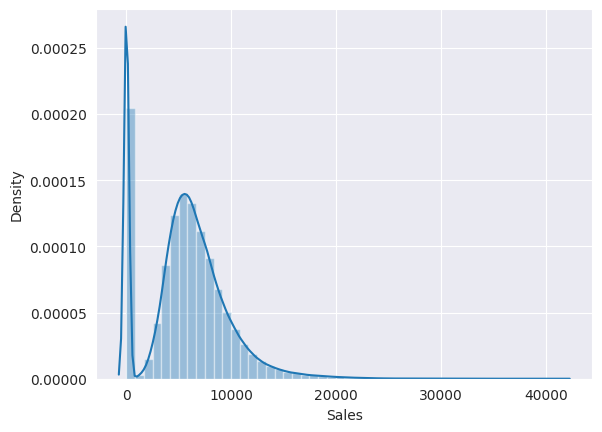

In [30]:
# Let's check the Sales column.
sns.distplot(rossmann_df.Sales)

## Here we can see that the Sales column is skewed(Right).
## So Median is more preferable than Mean.

In [31]:
# Let's convert the Dtype of column Date.
rossmann_df['Date']= pd.to_datetime(rossmann_df.Date)

In [32]:
# Let's extract Date, Month, Year from Date column.
rossmann_df['Day']= rossmann_df['Date'].apply(lambda x: x.day)
rossmann_df['Month']= rossmann_df['Date'].apply(lambda x: x.month)
rossmann_df['Year']= rossmann_df['Date'].apply(lambda x: x.year)

In [33]:
rossmann_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015


In [34]:
# Let's check no of stores present in the data set.
rossmann_df.Store.nunique()

1115

In [35]:
# Let's check the starting and Final date of our data set.

print("Starting Date is: {0}".format(rossmann_df.Date.min()))
print("Final Date is: {0}".format(rossmann_df.Date.max()))
print("So there is {0} of Data.".format(rossmann_df.Date.max()-rossmann_df.Date.min()))

Starting Date is: 2013-01-01 00:00:00
Final Date is: 2015-07-31 00:00:00
So there is 941 days 00:00:00 of Data.


In [36]:
rossmann_df.Year.unique()

array([2015, 2014, 2013])

In [37]:
# Let's get the net sales per month for each year.
sales_per_month= rossmann_df.groupby(['Year', 'Month'])['Sales'].median().reset_index()


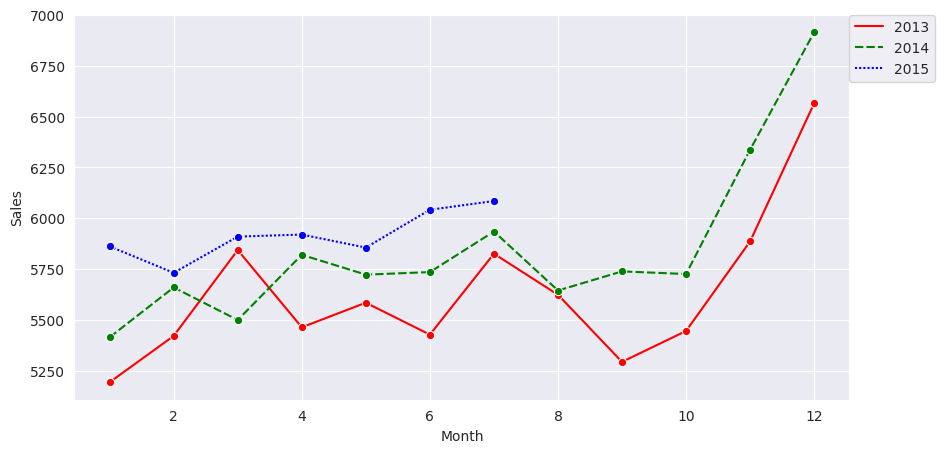

In [38]:
color= ['r', 'g', 'b']
plt.figure(figsize=(10,5))
sns.lineplot(x= 'Month', y= 'Sales', data= sales_per_month, hue= 'Year', palette= color, marker='o', style= 'Year')
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

### From above plot we can see that in the year of 2015 the sales run only upto the mopnth of July.

### We can also see that in the month of **October and December**, the sale is increasing exponentially.

### From further research we got that the reason behind the increase in sale is **Christmas and the upcoming New Year**

<Axes: >

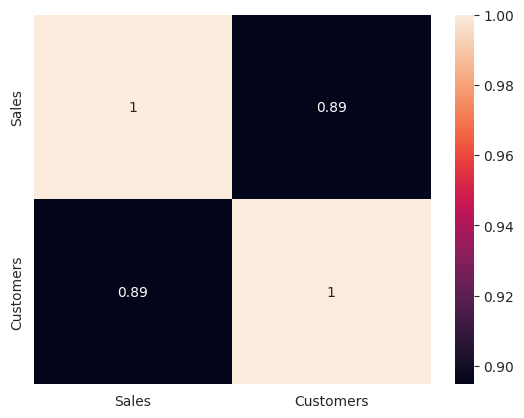

In [39]:
# Let's check the relation between Sales and Customers columns.
sns.heatmap(rossmann_df[['Sales', 'Customers']].corr(), annot= True)

## Here we can see that customers and sales are highly correlated.

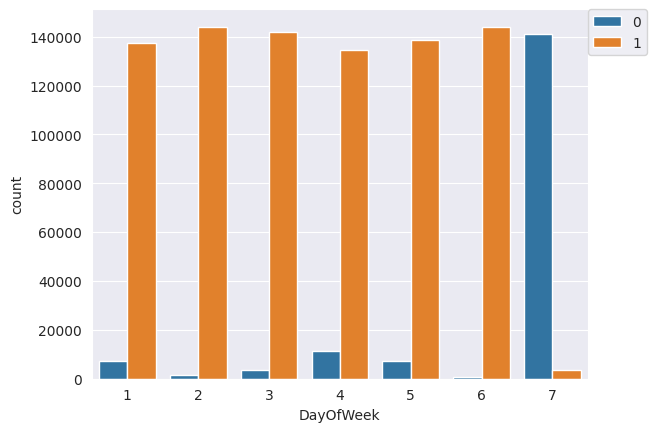

In [40]:
# Let's check the how many days and how many stores are open in a week.
sns.countplot(x= rossmann_df.DayOfWeek, hue= rossmann_df.Open)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

### Here we can clearly see that most of the stores are closed in Sundays.

<Axes: xlabel='Promo', ylabel='Sales'>

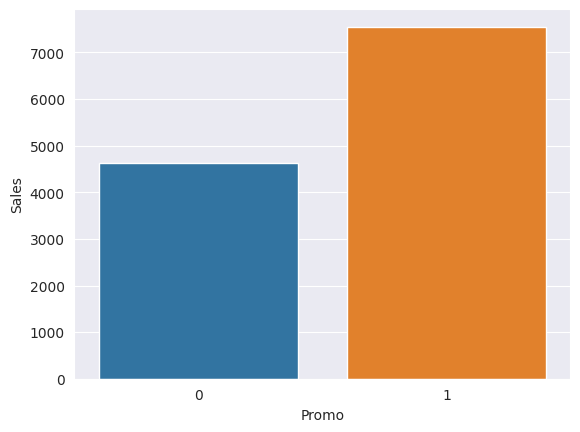

In [41]:
# Let's check the sales when promo is running and when not.
sales_wrt_promo = pd.DataFrame(rossmann_df.groupby('Promo').agg({'Sales':'median'})).reset_index()
sns.barplot(x= 'Promo', y= 'Sales', data= sales_wrt_promo)

## From above plot, we concluded that the sales when promo is running is high compared to the sales when promo is not running.

In [42]:
rossmann_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [43]:
# Let's check the impact of SchoolHoliday on Sales.
schoolholiday_vs_sale= rossmann_df.groupby('SchoolHoliday')['Sales'].median()   # As the sales is skewed, we are taking the median.
schoolholiday_vs_sale

SchoolHoliday
0    5642.0
1    6197.0
Name: Sales, dtype: float64

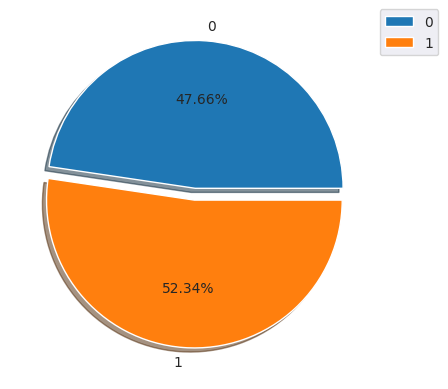

In [44]:
explode=[0.04, 0.04]
plt.pie(schoolholiday_vs_sale, labels= schoolholiday_vs_sale.index, autopct= '%1.2f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

## Here we can see that SchoolHoliday have some impact on sales.

## From above pie chart we saw that during SchooHoliday sales is more compared to the days where there is no SchoolHoliday.

In [45]:
# Let's check StateHoliday column
rossmann_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### We can see that that there are categorical variables in StateHoliday column.

### So we will change that column to proper numerical column with valid reasoning.

In [46]:
# Creating a function to convert categorical values to numerical values.
def change_type(arg):
  if arg==0:
    arg=0
  elif arg=='0':
    arg= 0
  else:
    arg=1
  return arg

In [47]:
# Let's use the above function to change the data type of StateHoliday column.
rossmann_df.StateHoliday= rossmann_df.StateHoliday.apply(lambda x: change_type(x) )

In [48]:
# Let's check StateHoliday column again.
rossmann_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [49]:
stateholiday_vs_sale= rossmann_df.groupby(['StateHoliday', 'Open'])['Sales'].median().reset_index()
stateholiday_vs_sale

,StateHoliday,Open,Sales
0,0,0,0.0
1,0,1,6368.0
2,1,0,0.0
3,1,1,7649.5


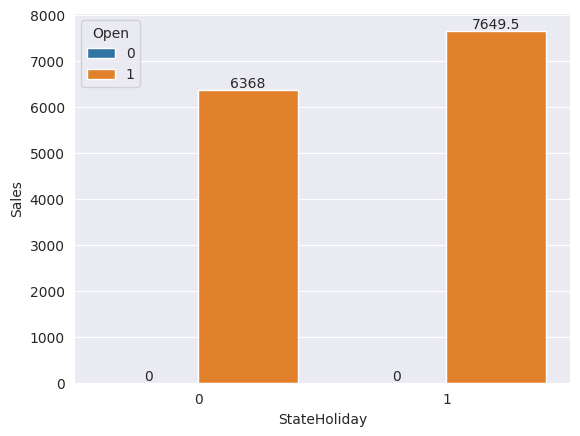

In [50]:
ax= sns.barplot(x= stateholiday_vs_sale.StateHoliday, y= stateholiday_vs_sale.Sales, hue= stateholiday_vs_sale.Open)
for i in ax.containers:
    ax.bar_label(i)

## Here we can see that in the days when there is StateHoliday, the sales is more compared to the days when there is no StateHoliday.

## Let's merge sales_df and rossmann_df.

In [51]:
# Merging 2 data frames.
df= pd.merge(sales_df, rossmann_df, how= 'right', on= 'Store')

In [52]:
# Let's rearrange the columns.
indexes= ['Store', 'StoreType', 'Assortment', 'Open', 'SchoolHoliday', 'StateHoliday', 'CompetitionDistance',
        'Promo', 'Promo2', 'Customers', 'Date','Day', 'Month', 'Year', 'DayOfWeek',  'Sales']

In [53]:
df= df.reindex(columns= indexes)

## **Exploratory Data Analysis on Merged Data Frame i.e df.**

In [54]:
df.head()

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064
2,3,a,a,1,1,0,14130.0,1,1,821,2015-07-31,31,7,2015,5,8314
3,4,c,c,1,1,0,620.0,1,0,1498,2015-07-31,31,7,2015,5,13995
4,5,a,a,1,1,0,29910.0,1,0,559,2015-07-31,31,7,2015,5,4822


In [55]:
# Let's create a column that contains the average spending done by customers.
df['Avg_sales_per_customer']= round(df.Sales / df.Customers, 2)

In [56]:
df.head(2)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales,Avg_sales_per_customer
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263,9.48
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064,9.70


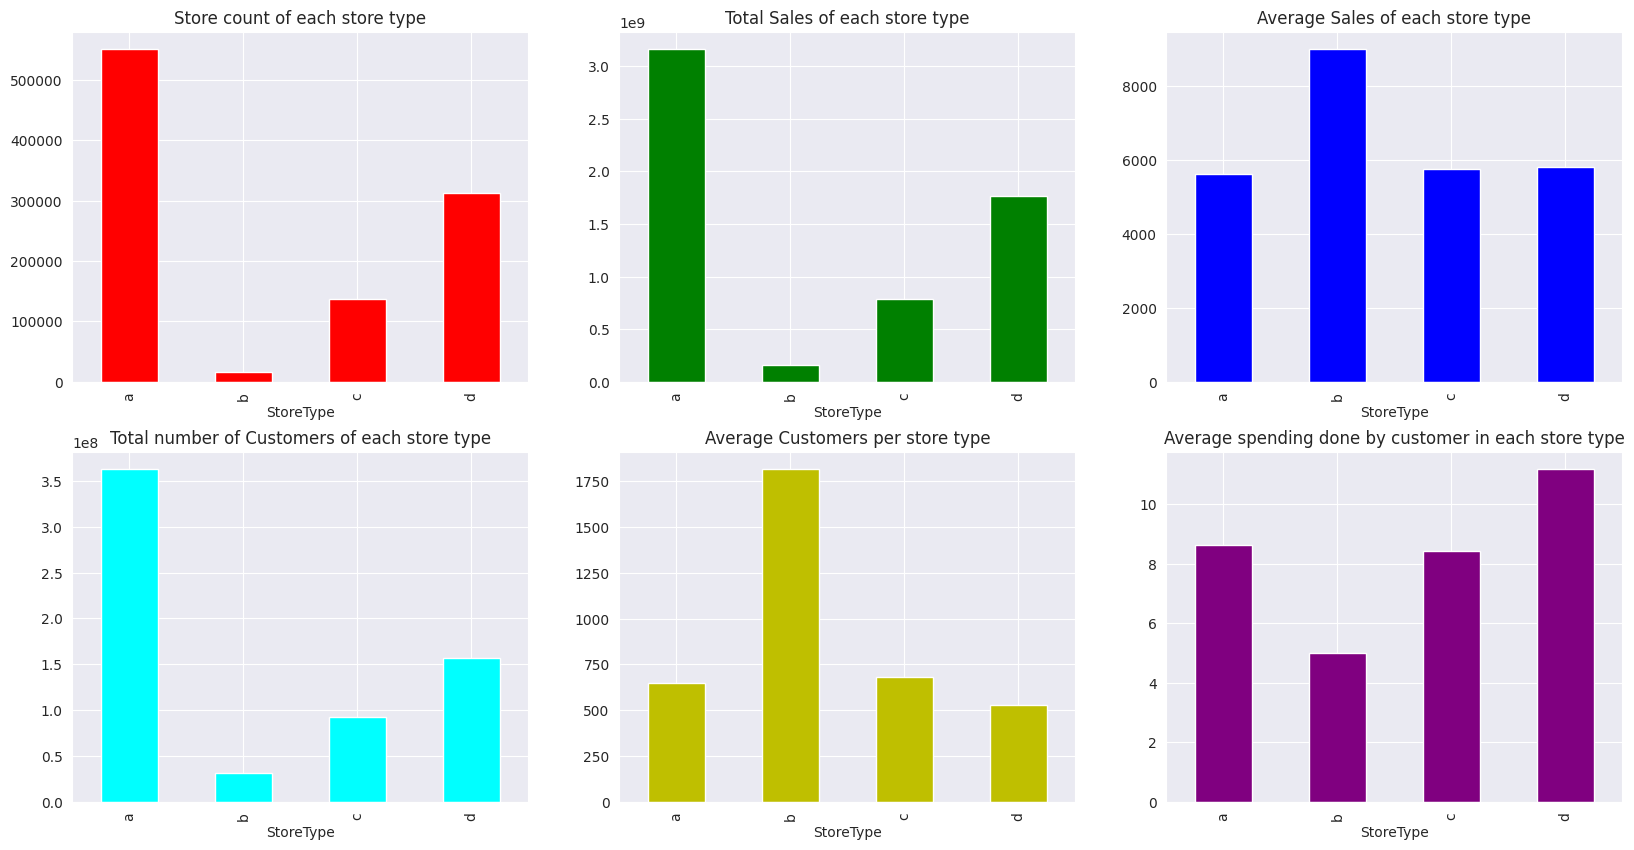

In [57]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], color= 'r', title = "Store count of each store type")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], color= 'g', title = "Total Sales of each store type")
df.groupby("StoreType")["Sales"].median().plot(kind = "bar", ax = ax[0,2], color= 'b', title = "Average Sales of each store type")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[1,0], color= 'cyan', title = "Total number of Customers of each store type")
df.groupby("StoreType")["Customers"].median().plot(kind = "bar", ax = ax[1,1], color= 'y', title = "Average Customers per store type")
df.groupby("StoreType")["Avg_sales_per_customer"].median().plot(kind = "bar", ax = ax[1,2], color= 'purple', title = "Average spending done by customer in each store type")

plt.subplots_adjust(hspace = 0.2, wspace= 0.2)
plt.show()

## Observations:
> The count of store type 'a' is maximun while store type 'b' is minimum.

> The total sale of store type 'a' is higher while the average sale of store type 'b' is higher compared to others.

> The total customers count of store type 'a' is higher while the average customer count of store type 'b' is higher.

> The average speding done by customers in store type 'd' is higher

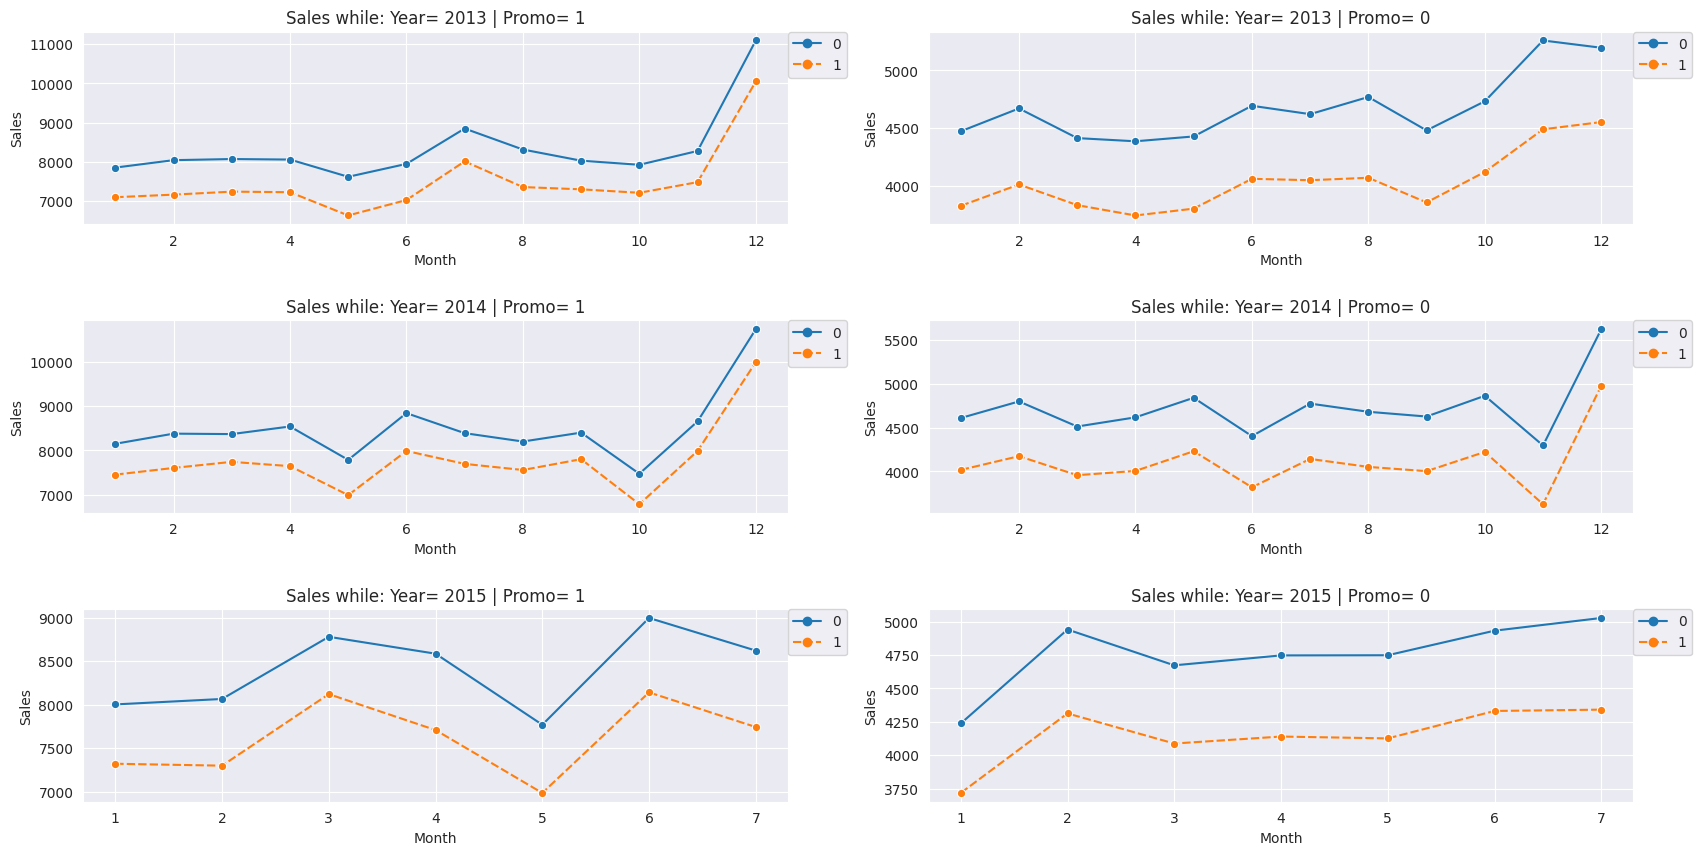

In [58]:
# Let's check the sales with respect to promo and promo2 for each year.
index= 1
plt.figure(figsize= (20,10))
for i in sorted(df.Year.unique().tolist()):
    for j in df.Promo.unique().tolist():
      plt.subplot(3,2,index)
      index +=1
      yearwise_data= df[df['Year']== i]
      promowise_data= yearwise_data[yearwise_data['Promo']== j]
      sns.lineplot(x= 'Month', y= 'Sales', data= promowise_data, hue= 'Promo2', ci= None, markers= 'o', style= 'Promo2')
      plt.title(f"Sales while: Year= {i} | Promo= {j}")
      plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
      plt.subplots_adjust(hspace = 0.5, wspace= 0.2)

### From above plots we can see that the sale is high while the promo is running but promo2 has no such effect.

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

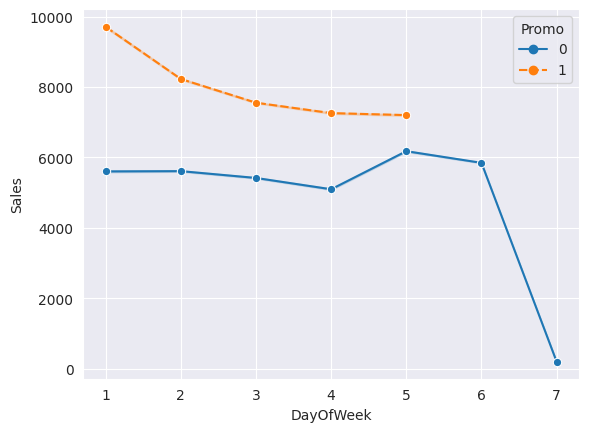

In [59]:
# Let's see the sales with respect to DayofWeek.
sns.lineplot(x= 'DayOfWeek', y= 'Sales', data= df, hue= 'Promo', markers= 'o', style= 'Promo')

### From above plot we can se that, the sales is decreasing in weekends.

### We can also see that the promo is running only in week days.

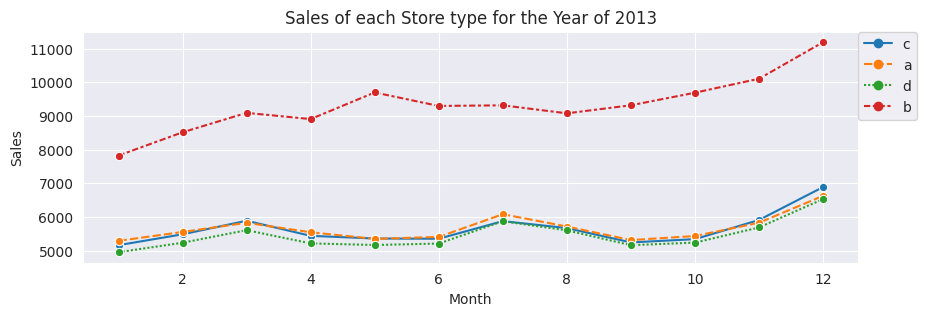

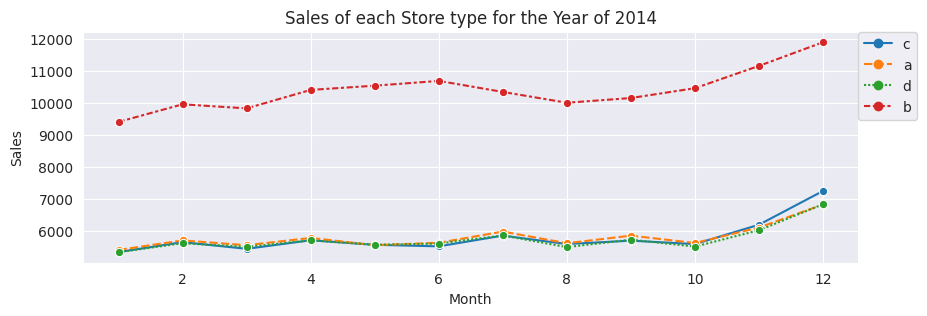

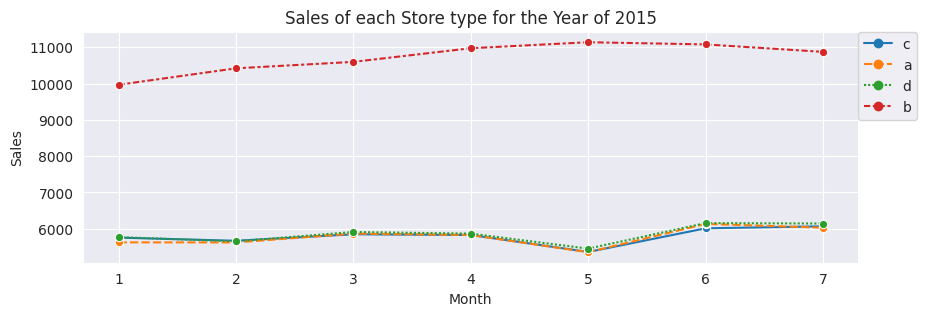

In [60]:
# Let's see the sale trend yearly.
for i in sorted(df.Year.unique().tolist()):
  plt.figure(figsize= (10,3))
  yearwise_df= df[df['Year']==i]
  sns.lineplot(data = yearwise_df, x = "Month", y = "Sales", hue = "StoreType", ci= None, style= 'StoreType', markers= 'o')
  plt.title(f'Sales of each Store type for the Year of {i}')
  plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
  plt.show()

### From above plot we can see that the Sales of Store type 'b' remains high through out the year for each year.

### For other Store types, the sales remain almost same through out the year.

In [61]:
# Let's see the impact of distance on the sales and customers count.
# Categorizing the distances into 6 types.
df["CompetitionDistance_category"] = pd.cut(df["CompetitionDistance"], 6)
df.sample(5, random_state= 1)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales,Avg_sales_per_customer,CompetitionDistance_category
985837,963,a,c,1,0,0,23620.0,0,0,1017,2013-01-29,29,1,2013,2,9609,9.45,"(12660.0, 25300.0]"
462798,859,c,a,1,0,0,21770.0,0,0,668,2014-05-13,13,5,2014,2,6670,9.99,"(12660.0, 25300.0]"
756833,534,d,a,1,1,0,1200.0,0,1,422,2013-08-22,22,8,2013,4,4967,11.77,"(-55.84, 12660.0]"
83457,948,b,b,1,0,0,1430.0,1,0,2169,2015-05-18,18,5,2015,1,8301,3.83,"(-55.84, 12660.0]"
250151,819,a,c,1,0,0,720.0,1,0,631,2014-12-17,17,12,2014,3,8889,14.09,"(-55.84, 12660.0]"


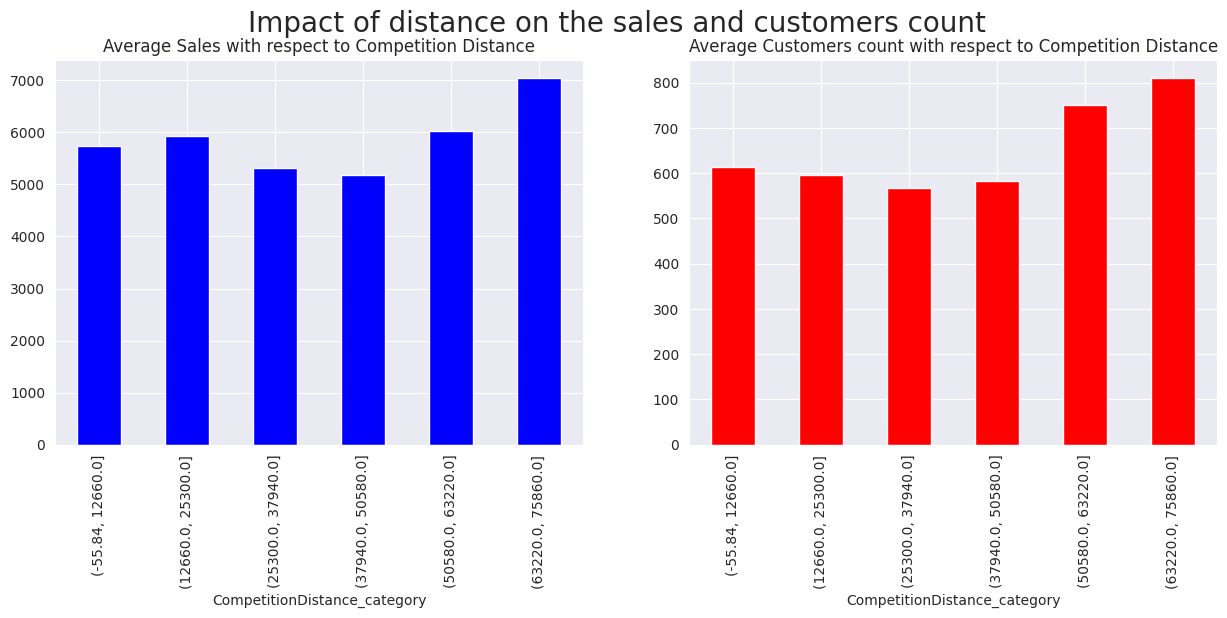

In [62]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_category").Sales.median().plot(kind = "bar", color= 'b',
                                                                  title = "Average Sales with respect to Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_category").Customers.median().plot(kind = "bar", color= 'r',
                                                                      title = "Average Customers count with respect to Competition Distance", ax = ax[1])
fig. suptitle("Impact of distance on the sales and customers count", fontsize=20)
plt.show()


### Here we can see that with increase in Competition Distance, the average Sale and Customer Count is increasing.

In [63]:
# Dropping the columns that is not necessary now and further.
df.drop(['Avg_sales_per_customer','CompetitionDistance_category'],axis=1,inplace=True)

In [64]:
df.head(2)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064


# **CONCLUSION FROM EXPLORATORY DATA ANALYSIS:**

1.

## **Data Preparation**

<Axes: >

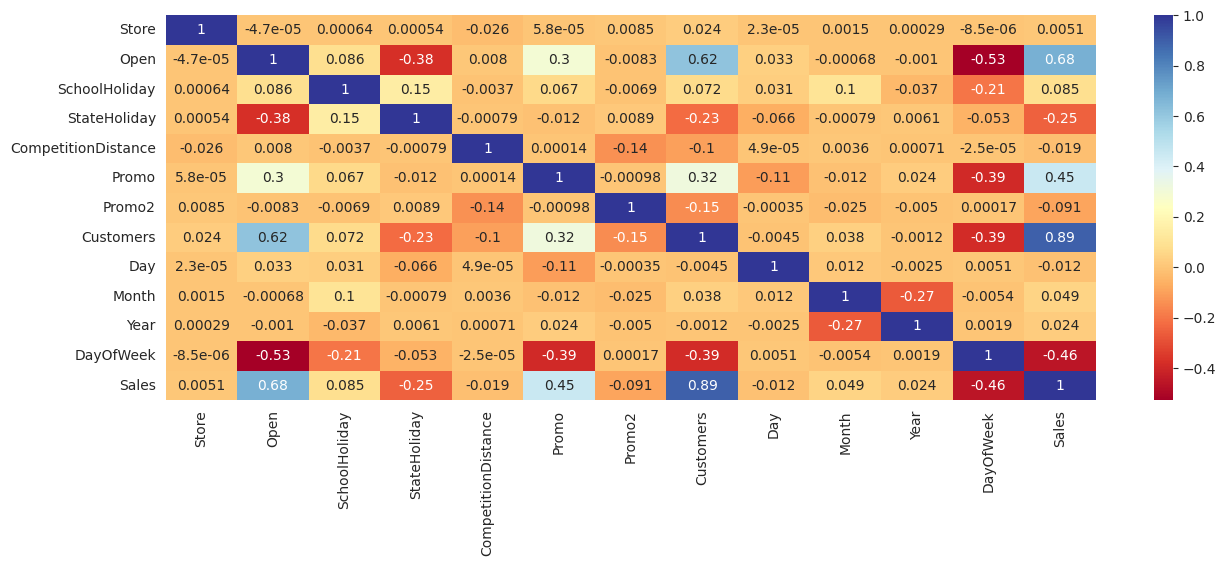

In [65]:
# Let's check the correlation between columns.
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot= True, cmap= 'RdYlBu')

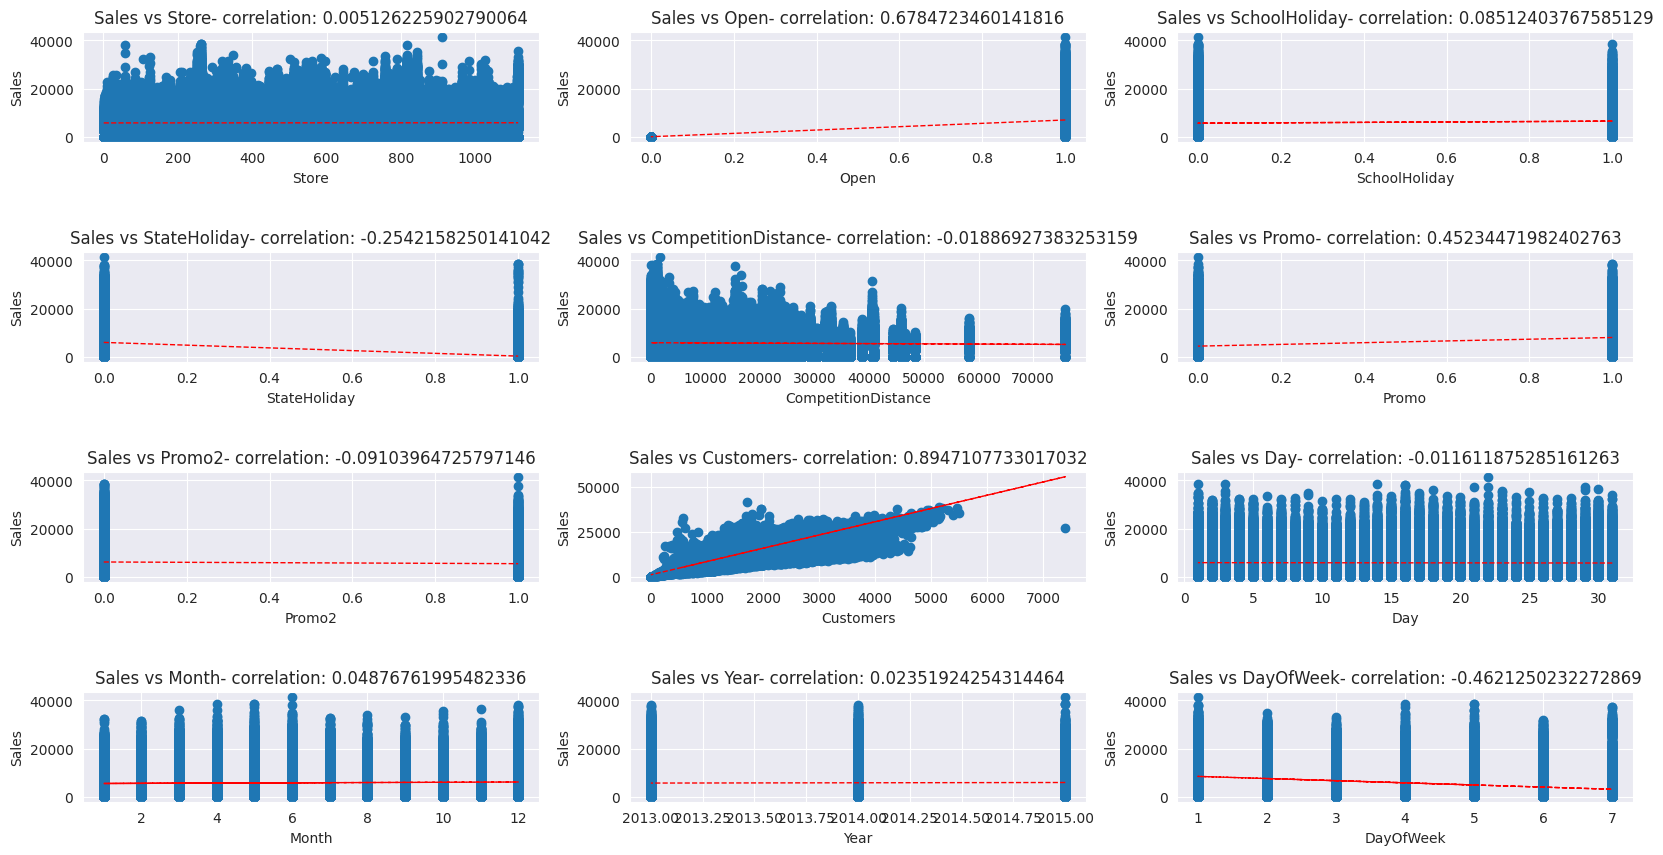

In [66]:
# Getting the correlation of each column with Sales and fitting a polynomial line.
index= 1
plt.figure(figsize= (20,10))
for col in df.select_dtypes(np.number).columns.tolist()[:-1]:
    plt.subplot(4,3,index)
    index +=1
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.subplots_adjust(hspace = 1, wspace= 0.2)

In [67]:
df.Sales.value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

### Here we can see that there are lots of observations with **Zeros** which don't add value to data in Sales column.

### So it is wise to remove those **Zeros.**

In [68]:
df= df[df.Sales > 0]

### As we extracted date, month and year from date column, there is no need for date column.

In [69]:
# Removing Date column
df.drop('Date', axis= 1, inplace= True)

In [70]:
# Let's create a function to check multicollinearity
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [71]:
# Let's check multicollinearity of columns.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.001826e+00
1,Open,7.244997e+06
2,SchoolHoliday,1.035987e+00
3,StateHoliday,1.003050e+00
4,CompetitionDistance,1.057365e+00
5,Promo,1.142318e+00
6,Promo2,1.078983e+00
7,Customers,1.128616e+00
8,Day,1.019182e+00
9,Month,1.095483e+00


### Here the only column **Open** have high multicollinearity. So we will remove that column.

In [72]:
# Let's check multicollinearity of columns again.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Open']]])

,variables,VIF
0,Store,4.019910
1,SchoolHoliday,1.284584
2,StateHoliday,1.004126
3,CompetitionDistance,1.573443
4,Promo,2.062271
5,Promo2,2.151959
6,Customers,5.208097
7,Day,4.408370
8,Month,4.164315
9,Year,25.064136


### Here the only column **Year** have high multicollinearity. So we will remove that column.

In [73]:
# Let's check multicollinearity of columns again.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Open', 'Year']]])

,variables,VIF
0,Store,3.570702
1,SchoolHoliday,1.271300
2,StateHoliday,1.003912
3,CompetitionDistance,1.470652
4,Promo,1.891335
5,Promo2,1.922434
6,Customers,4.194729
7,Day,3.671444
8,Month,3.701626
9,DayOfWeek,4.148935


In [74]:
# Taking those features with multicollinearity in the range of 0 to 10.
numerical_features= ['Store','SchoolHoliday','StateHoliday','CompetitionDistance','Promo','Promo2','Customers','Day','Month','DayOfWeek']

In [75]:
# Removing the columns: Open and Year
df.drop(['Open', 'Year'], axis= 1, inplace= True)

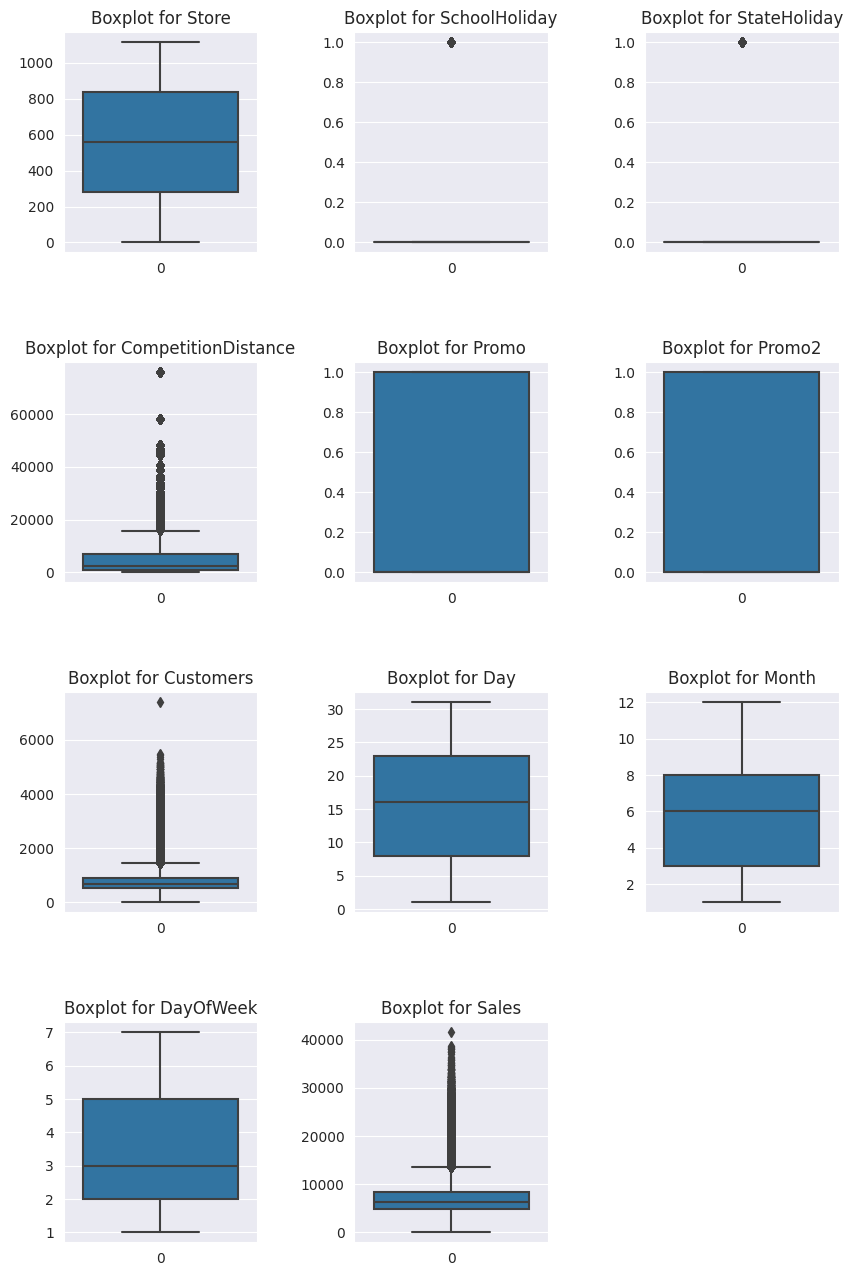

In [76]:
# Let's check the outliers in our Data Set by boxplot.
index= 1
desired_column= numerical_features.copy()
desired_column.append('Sales')
plt.figure(figsize= (10,20))
for i in desired_column:
  plt.subplot(5,3,index)
  index +=1
  num_col_data= df[i]
  sns.boxplot(df[i])
  plt.title(f"Boxplot for {i}")
  plt.subplots_adjust(hspace = 0.5, wspace= 0.5)

### Here we can see that thre are major outliers in the column of Customers and Sales.

In [77]:
# Function for removing outliers
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    lower_fence  = q1-1.5*iqr
    upper_fence = q3+1.5*iqr
    revised_df = data.loc[(data[column] > lower_fence) & (data[column] < upper_fence)]
    return revised_df

In [78]:
# Removing outliers from Sales Column
df= remove_outliers(df, 'Sales')
df= remove_outliers(df, 'Customers')

In [79]:
df.head()

,Store,StoreType,Assortment,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Day,Month,DayOfWeek,Sales
0,1,c,a,1,0,1270.0,1,0,555,31,7,5,5263
1,2,a,a,1,0,570.0,1,1,625,31,7,5,6064
2,3,a,a,1,0,14130.0,1,1,821,31,7,5,8314
4,5,a,a,1,0,29910.0,1,0,559,31,7,5,4822
5,6,a,a,1,0,310.0,1,0,589,31,7,5,5651


### Let's convert categorical variables into numerical variables by using dummies.

In [80]:
# Converting categorical variables into numerical variables.
new_df= pd.get_dummies(df, columns= ['StoreType','Assortment'])

In [81]:
new_df.head()

,Store,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Day,Month,DayOfWeek,Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1,0,1270.0,1,0,555,31,7,5,5263,0,0,1,0,1,0,0
1,2,1,0,570.0,1,1,625,31,7,5,6064,1,0,0,0,1,0,0
2,3,1,0,14130.0,1,1,821,31,7,5,8314,1,0,0,0,1,0,0
4,5,1,0,29910.0,1,0,559,31,7,5,4822,1,0,0,0,1,0,0
5,6,1,0,310.0,1,0,589,31,7,5,5651,1,0,0,0,1,0,0


## Now the **Data** is ready to be implemented in **Regression Analysis.**

#### Choosing Independant Variables(Features) and Target Variable.

In [82]:
# Choosing Independant Variables(Features).
x= new_df.drop(['Sales', 'Store'], axis= 1)
x.head()

,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Day,Month,DayOfWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,0,1270.0,1,0,555,31,7,5,0,0,1,0,1,0,0
1,1,0,570.0,1,1,625,31,7,5,1,0,0,0,1,0,0
2,1,0,14130.0,1,1,821,31,7,5,1,0,0,0,1,0,0
4,1,0,29910.0,1,0,559,31,7,5,1,0,0,0,1,0,0
5,1,0,310.0,1,0,589,31,7,5,1,0,0,0,1,0,0


In [83]:
# Choosing Target Variable.
y= new_df.Sales
y.head()

0    5263
1    6064
2    8314
4    4822
5    5651
Name: Sales, dtype: int64

### Using **train_test_split** to train and test the data.

In [84]:
# Using train_test_split on x and y.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [85]:
print(f'x_train shape:{x_train.shape} | x_test shape:{x_test.shape}')
print('\n')
print(f'y_train shape:{y_train.shape} | y_test shape:{y_test.shape}')

x_train shape:(551640, 16) | x_test shape:(236418, 16)


y_train shape:(551640,) | y_test shape:(236418,)


## **IMPLIMENTING LINEAR REGRESSION**

In [86]:
# Applying Linear regression
reg= LinearRegression().fit(x_train, y_train)

In [87]:
# Checking regression co-efficient.
reg.coef_

array([ 2.91659928e+01, -4.40546536e+02,  2.48721541e-02,  1.00080198e+03,
        3.72663471e+02,  7.96862797e+00,  1.07150642e+00,  1.65767990e+01,
       -1.26965097e+01,  1.08536836e+02, -1.28089364e+03, -9.05169021e+01,
        1.26287370e+03,  1.01616939e+03, -2.29977667e+03,  1.28360728e+03])

In [88]:
len(reg.coef_)

16

In [89]:
# Checking Regression Intercept
reg.intercept_

-1446.5940667203286

In [90]:
# Checking regression Score for training data.
reg.score(x_train, y_train)

0.7783031864226007

In [91]:
# Checking regression Score for testing data.
reg.score(x_test, y_test)

0.7774273721084137

In [92]:
# Predicting on training data
y_pred_train= reg.predict(x_train)

In [93]:
# Predicting on testing data
y_pred_test= reg.predict(x_test)

In [94]:
# Checking Mean Squared Error for training data
mean_squared_error(y_train, y_pred_train)

1176204.106006097

In [95]:
# Checking Root Mean Squared Error for training data
math.sqrt(mean_squared_error(y_train, y_pred_train))

1084.5294398982892

In [96]:
# r2 score for training data
r2_score(y_train, y_pred_train)

0.7783031864226007

In [97]:
# Checking Mean Squared Error for testing data
mean_squared_error(y_test, y_pred_test)

1177168.7708438265

In [98]:
# Checking Root Mean Squared Error for testing data
math.sqrt(mean_squared_error(y_test, y_pred_test))

1084.9740876370397

In [99]:
# r2 score for testing data
r2_score(y_test, y_pred_test)

0.7774273721084137

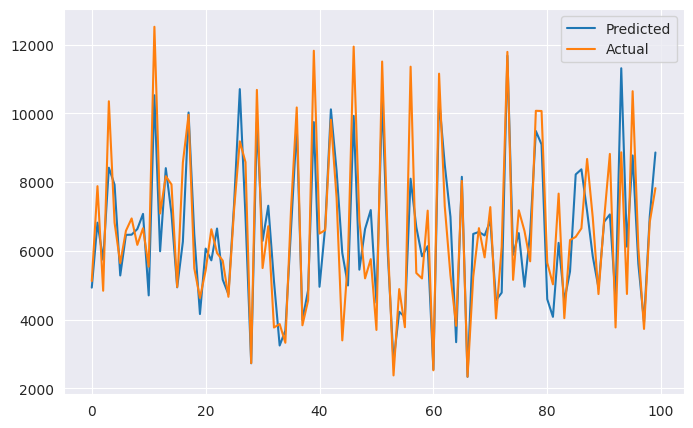

In [100]:
# Plotting 100 Predicted and Actual test data on a same plane.
plt.figure(figsize=(8,5))
plt.plot(y_pred_test[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [101]:
# Taking 100 Observations from Actual and Predicted data
actual_data= y_test[:100]
predicted_data= y_pred_test[:100]

# Creating a data frame using above data
regression_df= pd.DataFrame({'Actual':actual_data, 'Predicted':predicted_data})

In [102]:
regression_df.head()

,Actual,Predicted
968564,5122,4930.378764
638165,7882,6819.968488
754898,4840,5739.632523
587634,10351,8419.043959
98149,6822,7924.285668


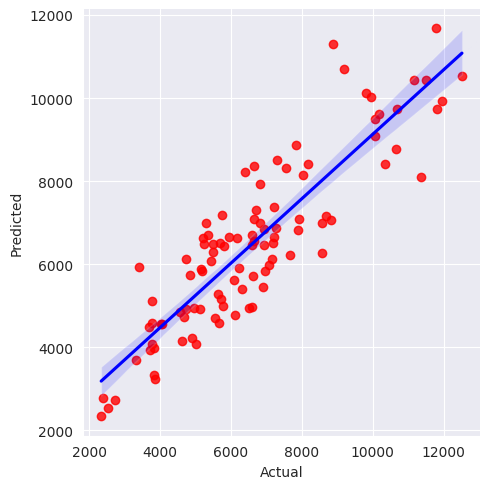

In [103]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual', y= 'Predicted', data= regression_df, scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

In [112]:
# Let's get the summary of the algorithm.
beta_df= sm.add_constant(x)     # Adding a constant to the data
model= sm.OLS(y, beta_df).fit()
prediction= model.predict(beta_df)

# Checking thw summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.973e+05
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:30:02   Log-Likelihood:            -6.6260e+06
No. Observations:              788058   AIC:                         1.325e+07
Df Residuals:                  788043   BIC:                         1.325e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -914.7068      6.848   -133.566      0.000    -928.129    -901.284
SchoolHoliday          27.8299      3.158      8.811      0.000      21.639      34.020
StateHoliday         -516.5942     45.698    -11.305      0.000    -606.161    -427.028
CompetitionDistance     0.0251      0.000    154.624      0.000       0.025       0.025
Promo                1001.6113      2.664    376.036      0.000     996.391    1006.832
Promo2                375.5778      2.554    147.029      0.000     370.571     380.584
Customers               7.9652      0.006   1408.555      0.000       7.954       7.976
Day                     1.1201      0.143      7.850      0.000       0.840       1.400
Month                  16.8247      0.373     45.121      0.000      16.094      17.556
DayOfWeek             -12.4479      0.753    -16.524      0.000     -13.924     -10.971
StoreType_a          -123.9965      5.899    -21.019      0.000    -135.559    -112.434
StoreType_b         -1500.4724     15.539    -96.561      0.000   -1530.929   -1470.016
StoreType_c          -320.3784      6.319    -50.700      0.000    -332.764    -307.993
StoreType_d          1030.1405      6.045    170.421      0.000    1018.293    1041.988
Assortment_a          714.9628      9.216     77.578      0.000     696.900     733.026
Assortment_b        -2608.5942     22.820   -114.311      0.000   -2653.321   -2563.867
Assortment_c          978.9246      9.348    104.724      0.000     960.603     997.246
==============================================================================
Omnibus:                    29400.334   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40031.207
Skew:                           0.392   Prob(JB):                         0.00
Kurtosis:                       3.777   Cond. No.                     8.24e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **IMPLIMENTING LASSO REGRESSION**

In [144]:
# Fitting lasso regression to the model
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [145]:
# Checking the Lasso Score
lasso.score(x_train, y_train)

0.7783031864192108

In [124]:
# Checking Lasso Coefficient
lasso.coef_

array([ 2.91652569e+01, -4.40406198e+02,  2.48721466e-02,  1.00080166e+03,
        3.72662878e+02,  7.96862708e+00,  1.07150457e+00,  1.65768005e+01,
       -1.26965521e+01, -7.91690171e+02, -2.18112459e+03, -9.90743172e+02,
        3.62646552e+02, -2.48021848e+02, -3.56392684e+03,  1.94158336e+01])

In [148]:
y_pred_lasso= lasso.predict(x_test)

In [149]:
# Checking MSE, RMSE AND R2 Score for Lasso Regression
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE LASSO :" , MSE_lasso)

RMSE_lasso = np.sqrt(MSE_lasso)
print("RMSE LASSO:" ,RMSE_lasso)

r2_lasso = r2_score(y_test,y_pred_lasso)
print("R2 LASSO:" ,r2_lasso)

MSE LASSO : 1177168.8170536456


RMSE LASSO: 1084.9741089323954


R2 LASSO: 0.777427363371314


In [128]:
# Let's Cross validate
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [130]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print('\n')
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}



Using  {'alpha': 0.0014}  the negative mean squared error is:  -1176274.2773604826


In [146]:
y_pred_lasso_cv = lasso_regressor.predict(x_test)

In [147]:
# Checking MSE, RMSE AND R2 Score for Lasso Regression after Cross Validation.
MSE_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
print("MSE LASSO CV :" , MSE_lasso_cv)

RMSE_lasso_cv = np.sqrt(MSE_lasso_cv)
print("RMSE LASSO CV :" ,RMSE_lasso_cv)

r2_lasso_cv = r2_score(y_test,y_pred_lasso_cv)
print("R2 LASSO CV :" ,r2_lasso_cv)

MSE LASSO CV : 1177169.4213025034


RMSE LASSO CV : 1084.9743873946995


R2 LASSO: 0.7774272491232475


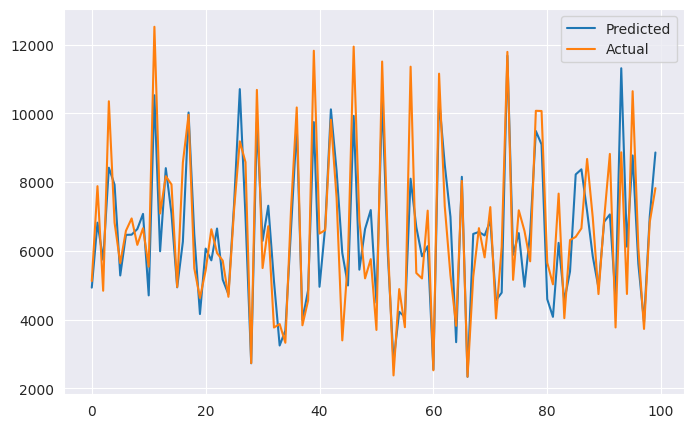

In [139]:
# Plotting the y Actual and Y predicted on a same plane
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso_cv[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

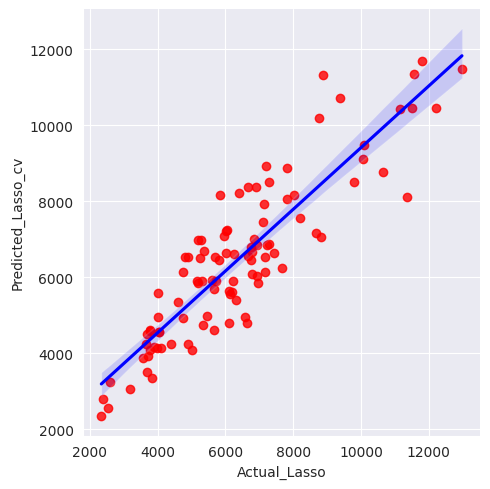

In [163]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual_Lasso', y= 'Predicted_Lasso_cv', data= pd.DataFrame({'Actual_Lasso':y_test[50:150],
                                      'Predicted_Lasso_cv':y_pred_lasso_cv[50:150]}), scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

## **IMPLIMENTING RIDGE REGRESSION**

In [150]:
## Fitting Ridge regression to the model
ridge  = Ridge(alpha=0.1)

ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [152]:
ridge.score(x_train, y_train)

0.7783031864061055

In [153]:
y_pred_ridge = ridge.predict(x_test)

In [156]:
# Checking MSE, RMSE AND R2 Score for Ridge Regression.
MSE_ridge  = mean_squared_error(y_test, y_pred_ridge)
print("MSE RIDGE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE RIDGE :" ,RMSE_ridge)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 RIDGE :" ,r2_ridge)

MSE RIDGE : 1177168.809295745
RMSE RIDGE : 1084.974105357241
R2 RIDGE : 0.7774273648381353


In [159]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [160]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -1176274.2550942781


In [161]:
y_pred_ridge_cv = ridge_regressor.predict(x_test)

In [162]:
# Checking MSE, RMSE AND R2 Score for Ridge Regression after Cross Validation.
MSE_ridge_cv  = mean_squared_error(y_test, y_pred_ridge_cv)
print("MSE RIDGE CV :" , MSE_ridge_cv)

RMSE_ridge_cv = np.sqrt(MSE_ridge_cv)
print("RMSE RIDGE CV :" ,RMSE_ridge_cv)

r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
print("R2 RIDGE CV :" ,r2_ridge_cv)

MSE RIDGE CV : 1177169.162587242
RMSE RIDGE CV : 1084.9742681682558
R2 RIDGE CV : 0.777427298039713


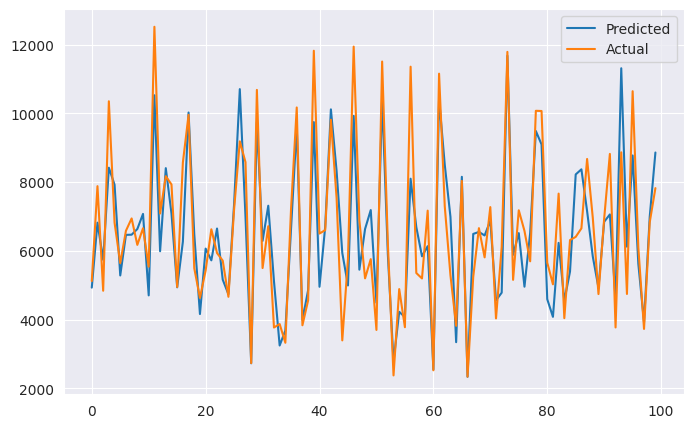

In [164]:
# Plotting the y Actual and Y predicted on a same plane
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge_cv[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

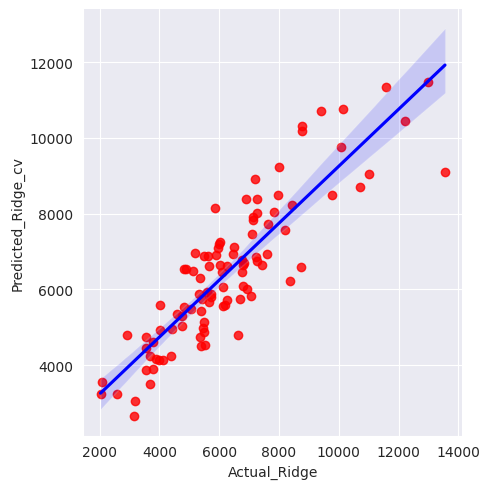

In [166]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual_Ridge', y= 'Predicted_Ridge_cv', data= pd.DataFrame({'Actual_Ridge':y_test[100:200],
                                      'Predicted_Ridge_cv':y_pred_ridge_cv[100:200]}), scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

## **IMPLIMENTING ELASTICNET REGRESSION**

In [167]:
## Fitting ElasticNet regression to the model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [170]:
elasticnet.score(x_train, y_train)

0.7650668756178312

In [172]:
y_pred_en = elasticnet.predict(x_test)

In [173]:
# Checking MSE, RMSE AND R2 Score for ElasticNet Regression.
MSE_elasticnet  = mean_squared_error(y_test, y_pred_en)
print("MSE ElasticNet :" , MSE_elasticnet)

RMSE_elasticnet = np.sqrt(MSE_elasticnet)
print("RMSE ElasticNet :" ,RMSE_elasticnet)

r2_elasticnet = r2_score(y_test, y_pred_en)
print("R2 ElasticNet :" ,r2_elasticnet)

MSE ElasticNet : 1249596.5727196296
RMSE ElasticNet : 1117.8535560258463
R2 ElasticNet : 0.7637331197673896


In [ ]:
# Cross Validating
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
y_pred_en_cv = elastic_regressor.predict(x_test)

In [ ]:
# Checking MSE, RMSE AND R2 Score for ElasticNet Regression after Cross Validation.
MSE_elasticnet_cv  = mean_squared_error(y_test, y_pred_en_cv)
print("MSE ElasticNet CV :" , MSE_elasticnet_cv)

RMSE_elasticnet_cv = np.sqrt(MSE_elasticnet_cv)
print("RMSE ElasticNet CV :" ,RMSE_elasticnet_cv)

r2_elasticnet_cv = r2_score(y_test, y_pred_en_cv)
print("R2 ElasticNet CV :" ,r2_elasticnet_cv)

In [ ]:
# Plotting the y Actual and Y predicted on a same plane
plt.figure(figsize=(8,5))
plt.plot(y_pred_en_cv[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual_ElasticNet', y= 'Predicted_ElasticNet_cv', data= pd.DataFrame({'Actual_ElasticNet':y_test[150:250],
                                      'Predicted_ElasticNet_cv':y_pred_en_cv[150:250]}), scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})